In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

## Loading the input file

In [2]:
df = pd.read_csv('Book1.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Scatter plot of the input data

Text(0, 0.5, 'Height')

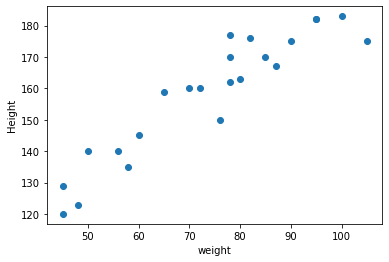

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("weight")
plt.ylabel("Height")

## Finding the correlation

In [4]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


### Pearson correlation

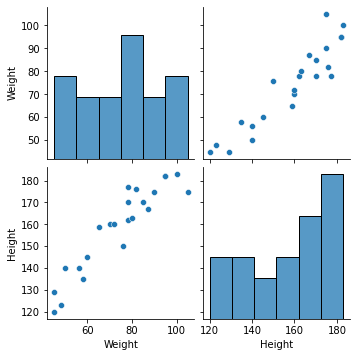

In [5]:
sns.pairplot(df)

## independent and dependent features

### Always change the independent feature to a data frame or a 2-dimensional array.
### The dependent feature can stay as a series
### to change to a data frame use double square brackets

In [6]:
#Here it shows its a series
X = df['Weight']
np.array(X).shape

(23,)

In [7]:
#Here it shows its a data frame or a 2-dimensional array
X = df[['Weight']]
Y = df['Height']
np.array(X).shape
np.array(Y).shape

(23,)

## Train Test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)
# To randomly select the number of data to train the dataset

### X is the feature matrix (input variables), and Y is the target variable (output variable or labels). 
1. train_test_split is used to split the dataset into training and testing sets.
2. test_size=0.25 means that 25% of the data will be used for testing, and the remaining 75% will be used for training.
3. random_state=42 sets a seed for the random number generator, ensuring that the random split is reproducible. Using the same seed will result in the same split every time the code is run, which can be useful for reproducibility in machine learning experiments.

In [10]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [11]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [12]:
X_test.shape

(6, 1)

In [13]:
X_train.shape

(17, 1)

### if you see we used 75% of the raw data i.e. the X feature for the training. that is 75% of 23 data points is 17 points.


## Standardisation of the independent feature
### stadardisation means applying the z_score formula so that the data set has mean = 0 and standard deviation is 1.
### Makes the calculation easy. Also standardisation is applied to the independent feature because we use it to find out the gradient curve


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

### In machine learning, especially when dealing with preprocessing steps such as feature scaling, normalization, or encoding categorical variables, it's common to split your data into training and testing sets. When applying these preprocessing steps, you may use `fit_transform` on the training data and `transform` on the test data. Here's the rationale behind this approach:

1. **Training Data (fit_transform):**
   - The `fit_transform` method is used on the training data to both learn the parameters of the transformation and apply the transformation to the data. This means that the model learns the scaling factors, means, or any other parameters necessary for the transformation based on the training data.
   - For example, if you're using a `StandardScaler` to standardize your features, `fit_transform` calculates the mean and standard deviation of the features in the training set and then scales the data accordingly.

2. **Testing Data (transform):**
   - Once the model has been trained and the transformation parameters have been learned from the training data, you want to apply the same transformation to any new, unseen data.
   - For the test data, you use `transform` instead of `fit_transform`. This is because you don't want to relearn the parameters from the test set; you want to apply the same transformation that was learned from the training set.
   - Applying the transformation learned from the training set ensures that the test data is processed in the same way as the training data, maintaining consistency and preventing data leakage.

Here's an example using the `StandardScaler` from scikit-learn:

```python
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)
```

This practice helps ensure that the preprocessing steps are applied consistently across training and test datasets, contributing to the generalization performance of your machine learning model.

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### Apply linear regression

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression(n_jobs = -1)

In [21]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [25]:
print('slope or coefficient:',regression.coef_)
print('intercept:',regression.intercept_)

slope or coefficient: [17.2982057]
intercept: 156.47058823529412


## Plot best fit line for training data

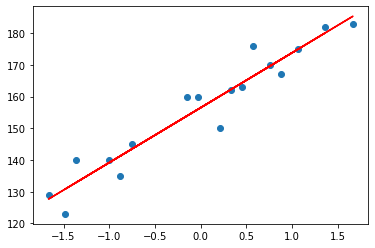

In [28]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train), color = 'red')

## Prediction of test data
1. predicted height output = intercept + coeffcients(weight)

In [38]:
Y_pred = regression.predict(X_test)

## Performance metrics

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [40]:
print(mae, mse, rmse)

9.665125886795005 114.84069295228699 10.716374991212605


## R Squared

In [35]:
from sklearn.metrics import r2_score

In [42]:
#Finding the R-squared
score = r2_score(Y_test, Y_pred)
score

0.7360826717981276

In [47]:
#Finding the adjusted R-squared
score_adjusted = 1 - ((1 - score) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1))
score_adjusted

0.6701033397476595

## Oridnary Least Square(OLS) Linear Regression

In [48]:
import statsmodels.api as sm


In [49]:
model = sm.OLS(Y_train, X_train).fit()

In [51]:
prediction = model.predict(X_test)

In [52]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [54]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                       0.664
Time:                        18:42:48   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Checking the prediction for a new value
### Why we used transform? Because the values are standardised. So we need to either scale up the values or scale down the new input value.

In [56]:
regression.predict(scaler.transform([[72]]))

array([155.97744705])